Linear Classifiers
In this assignment I loaded a dataset and trained a Logistic regression Classifier.

The Dataset
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

In [70]:
# Import packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [71]:
# Data source file path 

url = "C:\Portfolio\Data Engineer Track\Thinkful\Assignments\Linear Classifier\parkinsons.xlsx"

In [72]:
# Dataframe variable

df_data = pd.read_excel(url).drop(columns = "name", axis = 1)

In [73]:
# First five columns

df_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [74]:
# Set up X and y variables

X = df_data.drop(["status"], axis = 1)

y = df_data["status"] 

In [75]:
# Estalish x and y train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
# Fit and determine the accuracy of the model without regularlization

lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.796


In [77]:
# Fit and determine the accuracy of the model with L2 regularlization

lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression with L2 regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression with L2 regularization: 0.796


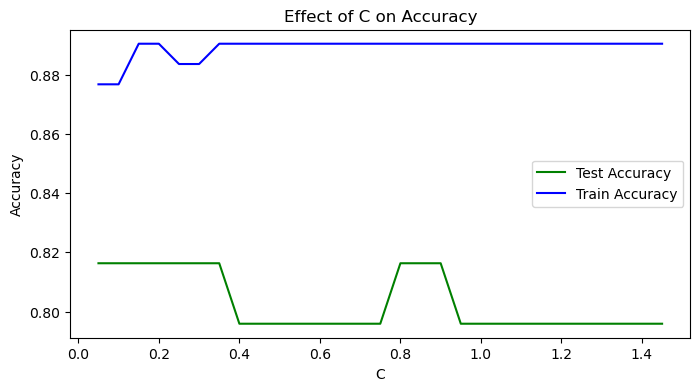

In [78]:
# Find the appropriate c parameter 

c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()
     


Between 0.95 to 1.4, the appropriate c value. This combination causes the test accuracy and train accuracy
have minimal distance between the test and training accuracies and less overfitting occurs.